# Chapter 10: RNN(Recurrent Neural Network) Application in IMDB Reviews and Sarcasm Reviews Dataset

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def plotGraph(history):
    loss,acc,val_loss,val_acc = history.history.values()
    epochs = range(1,len(loss)+1)
    # Plot graph
    plt.plot(epochs,acc,'r-^',label = 'Training Accuracy')
    plt.plot(epochs,val_acc,'b-*', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs,loss,'r-^',label='Training Loss')
    plt.plot(epochs,val_loss,'b-*',label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()

def trainModel(model, num_epochs):
    model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.summary()
    plotGraph(model.fit(training_padded, training_label, epochs=num_epochs, validation_data=(testing_padded, testing_label)))

## Section 10.1: IMDB Dataset (Chapte 9.1)
### Model Constructions：
#### Input Layer (Fixed):
* Embedding
---
#### Optional Layers:
1. GlobalMaxPooling1D()
2. LSTM(32)
3. Bidirection(LSTM(64))
4. Bidirection(LSTM(64)) + Bidirection(LSTM(32))
5. Conv1D(128, 5, activation='relu') + GlobalMaxPooling1D()
6. GRU(32, dropout=0.2, recurrent_dropout=0.2)
7. GRU(32, dropout=0.1, recurrent_dropout=0.5)+GRU(32, dropout=0.1, recurrent_dropout=0.5, activation='relu')
---
#### Output Layers (Fixed):
- One relu Dense(4)
- One Sigmod Dense(1)

In [4]:
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)
training_sentences, training_label = [], []
testing_sentences, testing_label = [], []

for data, label in imdb['train']:
    training_sentences.append(str(data.numpy()))
    training_label.append(label.numpy())
for data, label in imdb['test']:
    testing_sentences.append(str(data.numpy()))
    testing_label.append(label)

training_sentences, training_label = np.array(training_sentences),  np.array(training_label)
testing_sentences, testing_label = np.array(testing_sentences), np.array(testing_label)

numWords = 10000
maxLen = 200
embedding_dim = 16

tokenizer = Tokenizer(num_words = numWords, oov_token = '<OOV>')
tokenizer.fit_on_texts(training_sentences)

training_sequence = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequence, maxlen= maxLen, padding = 'post', truncating = 'post')

testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequence, maxlen = maxLen)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 68        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 160,073
Trainable params: 160,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 14s 17ms/step - loss: 0.6442 - accuracy: 0.6786 - val_loss: 0.3905 - val_accuracy: 0.8512
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 0.3429 - accuracy: 0.8718 - 

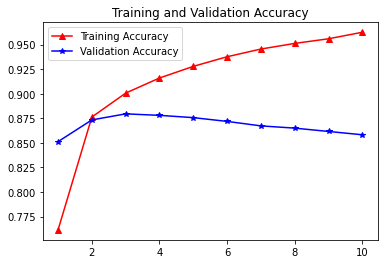

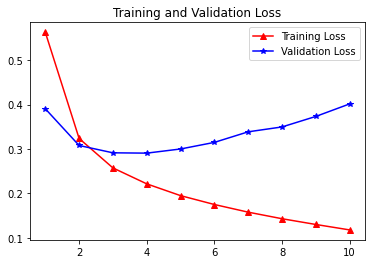

<Figure size 432x288 with 0 Axes>

In [3]:
# GlobalMaxPooling1D()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length = maxLen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 16)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 16)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 162,185
Trainable params: 162,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 30s 34ms/step - loss: 0.6931 - accuracy: 0.5034 - val_loss: 0.7144 - val_accuracy: 0.5082
Epoch 2/10
782/782 [==============================] - 25s 32ms/step - loss: 0.6781 - accuracy: 0.5670 

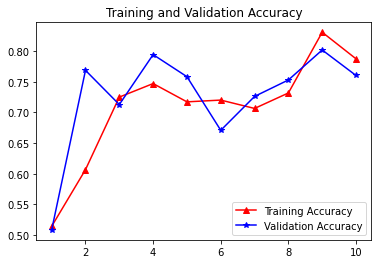

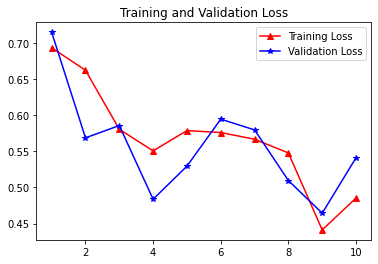

<Figure size 432x288 with 0 Axes>

In [4]:
# LSTM(32)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length = maxLen),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 42s 49ms/step - loss: 0.6544 - accuracy: 0.5962 - val_loss: 0.4837 - val_accuracy: 0.8050
Epoch 2/10
782/782 [==============================] - 37s 48ms/step - loss: 0.4949 - accuracy: 0.7728 

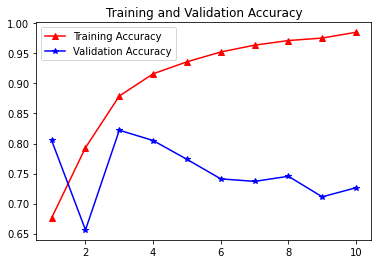

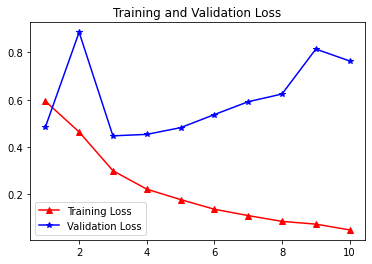

<Figure size 432x288 with 0 Axes>

In [5]:
# Bidirectional(LSTM(32))
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length = maxLen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 64)           12544     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dense (Dense)                (None, 4)                 132       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 183,049
Trainable params: 183,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 220s 270ms/step - loss: 0.6237 - accuracy: 0.6228 - val_loss: 

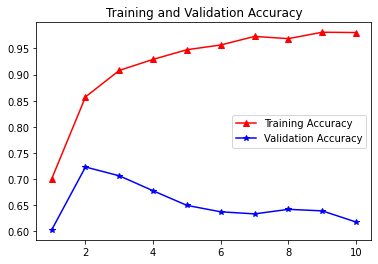

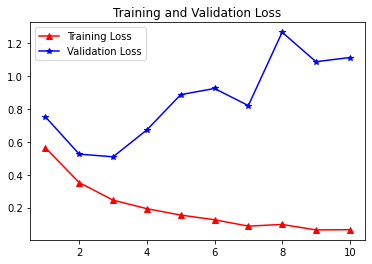

<Figure size 432x288 with 0 Axes>

In [5]:
# Bidirectional(LSTM(64)) + Bidirectional(LSTM(32))
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length = maxLen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 170,889
Trainable params: 170,889
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 16s 19ms/step - loss: 0.6060 - accuracy: 0.6351 - val_loss: 

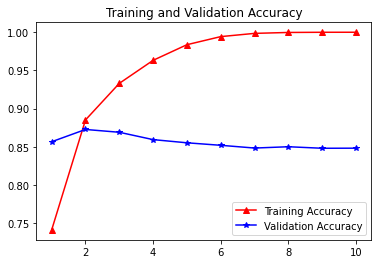

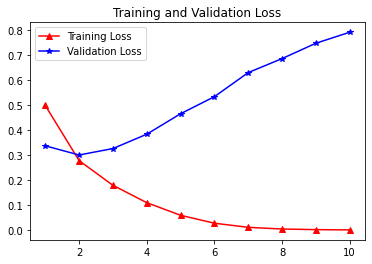

<Figure size 432x288 with 0 Axes>

In [6]:
# Conv1D(128, 5, activation='relu') + GlobalMaxPooling1D()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length = maxLen),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 32)           320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 326,473
Trainable params: 326,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 103s 127ms/step - loss: 0.6930 - accuracy: 0.5065 - val_loss: 0.6915 - val_accuracy: 0.5512
Epoch 2/10
782/782 [==============================] - 90s 115ms/step - loss: 0.6796 - accuracy: 0.56

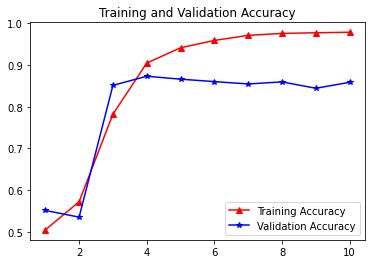

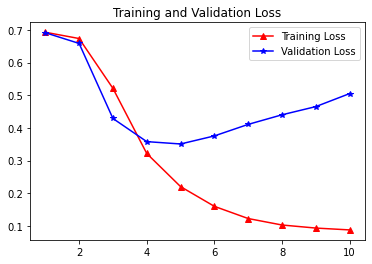

<Figure size 432x288 with 0 Axes>

In [7]:
# GRU(32)
embedding_dim = 32
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length = maxLen),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 10)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 32)           320000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12672     
_________________________________________________________________
dense_12 (Dense)             (None, 12)                780       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 13        
Total params: 333,465
Trainable params: 333,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 115s 139ms/step - loss: 0.6147 - accuracy: 0.6276 - val_loss: 0.7319 - val_accuracy: 0.6505
Epoch 2/5
782/782 [==============================] - 114s 146ms/step - loss: 0.3153 - accuracy: 0.875

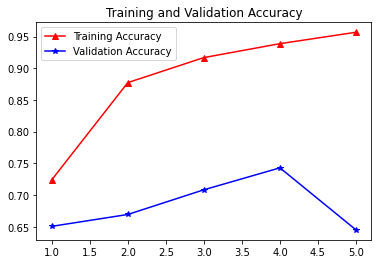

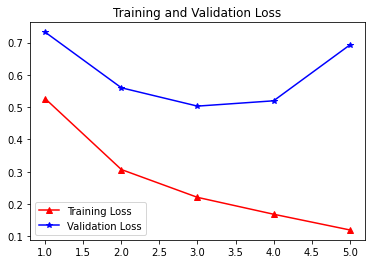

<Figure size 432x288 with 0 Axes>

In [11]:
# Bidirectional(GRU(32))
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length = maxLen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(12, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 5)